# Setup and Context

### Introduction

On November 27, 1895, Alfred Nobel signed his last will in Paris. When it was opened after his death, the will caused a lot of controversy, as Nobel had left much of his wealth for the establishment of a prize.

Alfred Nobel dictates that his entire remaining estate should be used to endow “prizes to those who, during the preceding year, have conferred the greatest benefit to humankind”.

Every year the Nobel Prize is given to scientists and scholars in the categories chemistry, literature, physics, physiology or medicine, economics, and peace. 

<img src=https://i.imgur.com/36pCx5Q.jpg>

Let's see what patterns we can find in the data of the past Nobel laureates. What can we learn about the Nobel prize and our world more generally?

### Import Statements

In [1]:
import pandas as pd
import numpy as np
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt

### Notebook Presentation

In [2]:
pd.options.display.float_format = '{:,.2f}'.format

### Read the Data

In [3]:
df_data = pd.read_csv('nobel_prize_data.csv')

In [4]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 962 entries, 0 to 961
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   year                   962 non-null    int64 
 1   category               962 non-null    object
 2   prize                  962 non-null    object
 3   motivation             874 non-null    object
 4   prize_share            962 non-null    object
 5   laureate_type          962 non-null    object
 6   full_name              962 non-null    object
 7   birth_date             934 non-null    object
 8   birth_city             931 non-null    object
 9   birth_country          934 non-null    object
 10  birth_country_current  934 non-null    object
 11  sex                    934 non-null    object
 12  organization_name      707 non-null    object
 13  organization_city      707 non-null    object
 14  organization_country   708 non-null    object
 15  ISO                    

In [5]:
df_data.head()

year    category                                           prize  \
0  1901   Chemistry               The Nobel Prize in Chemistry 1901   
1  1901  Literature              The Nobel Prize in Literature 1901   
2  1901    Medicine  The Nobel Prize in Physiology or Medicine 1901   
3  1901       Peace                      The Nobel Peace Prize 1901   
4  1901       Peace                      The Nobel Peace Prize 1901   

                                          motivation prize_share  \
0  "in recognition of the extraordinary services ...         1/1   
1  "in special recognition of his poetic composit...         1/1   
2  "for his work on serum therapy, especially its...         1/1   
3                                                NaN         1/2   
4                                                NaN         1/2   

  laureate_type                     full_name  birth_date         birth_city  \
0    Individual  Jacobus Henricus van 't Hoff  1852-08-30          Rotterdam   
1    Individual               Sully Prudhomme  1839-03-16              Paris   
2    Individual        Emil Adolf von Behring  1854-03-15  Hansdorf (Lawice)   
3    Individual                Frédéric Passy  1822-05-20              Paris   
4    Individual             Jean Henry Dunant  1828-05-08             Geneva   

      birth_country birth_country_current   sex   organization_name  \
0       Netherlands           Netherlands  Male   Berlin University   
1            France                France  Male                 NaN   
2  Prussia (Poland)                Poland  Male  Marburg University   
3            France                France  Male                 NaN   
4       Switzerland           Switzerland  Male                 NaN   

  organization_city organization_country  ISO  
0            Berlin              Germany  NLD  
1               NaN                  NaN  FRA  
2           Marburg              Germany  POL  
3               NaN                  NaN  FRA  
4               NaN                  NaN  CHE

Caveats: The exact birth dates for Michael Houghton, Venkatraman Ramakrishnan, and Nadia Murad are unknown. I've substituted them with mid-year estimate of July 2nd. 


# Data Exploration & Cleaning

**Challenge**: Preliminary data exploration. 
* What is the shape of `df_data`? How many rows and columns?
* What are the column names?
* In which year was the Nobel prize first awarded?
* Which year is the latest year included in the dataset?

In [6]:
print(f"The number of rows and columns in our data: {df_data.shape}")
print(f"The columns in our dataframe our: {df_data.columns}")

The number of rows and columns in our data: (962, 16)
The columns in our dataframe our: Index(['year', 'category', 'prize', 'motivation', 'prize_share',
       'laureate_type', 'full_name', 'birth_date', 'birth_city',
       'birth_country', 'birth_country_current', 'sex', 'organization_name',
       'organization_city', 'organization_country', 'ISO'],
      dtype='object')


In [7]:
print(f"The year in which first Nobel Prize was awarded: {df_data['year'].min()}")
print(f"The latest year in which Nobel Prize was awarded: {df_data['year'].max()}")

The year in which first Nobel Prize was awarded: 1901
The latest year in which Nobel Prize was awarded: 2020


**Challange**: 
* Are there any duplicate values in the dataset?
* Are there NaN values in the dataset?
* Which columns tend to have NaN values?
* How many NaN values are there per column? 
* Why do these columns have NaN values?  

### Check for Duplicates

In [8]:
df_data.duplicated().value_counts()

False    962
dtype: int64

### Check for NaN Values

In [9]:
df_data.isna().sum()

year                       0
category                   0
prize                      0
motivation                88
prize_share                0
laureate_type              0
full_name                  0
birth_date                28
birth_city                31
birth_country             28
birth_country_current     28
sex                       28
organization_name        255
organization_city        255
organization_country     254
ISO                       28
dtype: int64

### Type Conversions

**Challenge**: 
* Convert the `birth_date` column to Pandas `Datetime` objects
* Add a Column called `share_pct` which has the laureates' share as a percentage in the form of a floating-point number.

#### Convert Year and Birth Date to Datetime

In [10]:
df_data['birth_date'] = pd.to_datetime(df_data['birth_date'])
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 962 entries, 0 to 961
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   year                   962 non-null    int64         
 1   category               962 non-null    object        
 2   prize                  962 non-null    object        
 3   motivation             874 non-null    object        
 4   prize_share            962 non-null    object        
 5   laureate_type          962 non-null    object        
 6   full_name              962 non-null    object        
 7   birth_date             934 non-null    datetime64[ns]
 8   birth_city             931 non-null    object        
 9   birth_country          934 non-null    object        
 10  birth_country_current  934 non-null    object        
 11  sex                    934 non-null    object        
 12  organization_name      707 non-null    object        
 13  organ

#### Add a Column with the Prize Share as a Percentage

In [11]:
seprated_values = df_data['prize_share'].str.split('/', expand=True)
numerator = pd.to_numeric(seprated_values[0])
denominator = pd.to_numeric(seprated_values[1])
df_data['share_pct'] = numerator / denominator

In [12]:
df_data.head()

year    category                                           prize  \
0  1901   Chemistry               The Nobel Prize in Chemistry 1901   
1  1901  Literature              The Nobel Prize in Literature 1901   
2  1901    Medicine  The Nobel Prize in Physiology or Medicine 1901   
3  1901       Peace                      The Nobel Peace Prize 1901   
4  1901       Peace                      The Nobel Peace Prize 1901   

                                          motivation prize_share  \
0  "in recognition of the extraordinary services ...         1/1   
1  "in special recognition of his poetic composit...         1/1   
2  "for his work on serum therapy, especially its...         1/1   
3                                                NaN         1/2   
4                                                NaN         1/2   

  laureate_type                     full_name birth_date         birth_city  \
0    Individual  Jacobus Henricus van 't Hoff 1852-08-30          Rotterdam   
1    Individual               Sully Prudhomme 1839-03-16              Paris   
2    Individual        Emil Adolf von Behring 1854-03-15  Hansdorf (Lawice)   
3    Individual                Frédéric Passy 1822-05-20              Paris   
4    Individual             Jean Henry Dunant 1828-05-08             Geneva   

      birth_country birth_country_current   sex   organization_name  \
0       Netherlands           Netherlands  Male   Berlin University   
1            France                France  Male                 NaN   
2  Prussia (Poland)                Poland  Male  Marburg University   
3            France                France  Male                 NaN   
4       Switzerland           Switzerland  Male                 NaN   

  organization_city organization_country  ISO  share_pct  
0            Berlin              Germany  NLD       1.00  
1               NaN                  NaN  FRA       1.00  
2           Marburg              Germany  POL       1.00  
3               NaN                  NaN  FRA       0.50  
4               NaN                  NaN  CHE       0.50

# Plotly Donut Chart: Percentage of Male vs. Female Laureates

**Challenge**: Create a [donut chart using plotly](https://plotly.com/python/pie-charts/) which shows how many prizes went to men compared to how many prizes went to women. What percentage of all the prizes went to women?

In [13]:
gender_count = df_data['sex'].value_counts()

In [14]:
fig = px.pie(labels=gender_count.index,
            values=gender_count.values,
            title='Percentage of Male v/s Female',
            names=gender_count.index,
            hole=0.4)
fig.update_traces(textposition='inside', textfont_size=15, textinfo='percent')
fig.show()

C:\Users\Lenovo\anaconda3\lib\site-packages\plotly\express\_core.py:137: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  return args["labels"][column]


# Who were the first 3 Women to Win the Nobel Prize?

**Challenge**: 
* What are the names of the first 3 female Nobel laureates? 
* What did the win the prize for? 
* What do you see in their `birth_country`? Were they part of an organisation?

In [15]:
df_women = df_data[df_data['sex'] == 'Female'].sort_values('year')
print(f"First 3 women to win the nobel prize are: \n{df_women['full_name'][:3]} \n")
print(f"They won the nobel prize for: \n{df_women['prize'][:3]}")

First 3 women to win the nobel prize are: 
18                          Marie Curie, née Sklodowska
29    Baroness Bertha Sophie Felicita von Suttner, n...
51                        Selma Ottilia Lovisa Lagerlöf
Name: full_name, dtype: object 

They won the nobel prize for: 
18       The Nobel Prize in Physics 1903
29            The Nobel Peace Prize 1905
51    The Nobel Prize in Literature 1909
Name: prize, dtype: object


In [16]:
print(f"Their birth countries were: \n{df_women['birth_country'][:3]}\n")
print(f"Were they part of an Organization:")
if df_women['organization_name'][:3].isna().value_counts().index == True:
    print("No")
else:
    print("Yes")

Their birth countries were: 
18             Russian Empire (Poland)
29    Austrian Empire (Czech Republic)
51                              Sweden
Name: birth_country, dtype: object

Were they part of an Organization:
No


# Find the Repeat Winners

**Challenge**: Did some people get a Nobel Prize more than once? If so, who were they? 

In [17]:
is_winners = df_data.duplicated(subset=['full_name'], keep=False)
multiple_winners = df_data[is_winners]
multiple_winners

year   category                              prize  \
18   1903    Physics    The Nobel Prize in Physics 1903   
62   1911  Chemistry  The Nobel Prize in Chemistry 1911   
89   1917      Peace         The Nobel Peace Prize 1917   
215  1944      Peace         The Nobel Peace Prize 1944   
278  1954  Chemistry  The Nobel Prize in Chemistry 1954   
283  1954      Peace         The Nobel Peace Prize 1954   
297  1956    Physics    The Nobel Prize in Physics 1956   
306  1958  Chemistry  The Nobel Prize in Chemistry 1958   
340  1962      Peace         The Nobel Peace Prize 1962   
348  1963      Peace         The Nobel Peace Prize 1963   
424  1972    Physics    The Nobel Prize in Physics 1972   
505  1980  Chemistry  The Nobel Prize in Chemistry 1980   
523  1981      Peace         The Nobel Peace Prize 1981   

                                            motivation prize_share  \
18   "in recognition of the extraordinary services ...         1/4   
62   "in recognition of her services to the advance...         1/1   
89                                                 NaN         1/1   
215                                                NaN         1/1   
278  "for his research into the nature of the chemi...         1/1   
283                                                NaN         1/1   
297  "for their researches on semiconductors and th...         1/3   
306  "for his work on the structure of proteins, es...         1/1   
340                                                NaN         1/1   
348                                                NaN         1/2   
424  "for their jointly developed theory of superco...         1/3   
505  "for their contributions concerning the determ...         1/4   
523                                                NaN         1/1   

    laureate_type                                          full_name  \
18     Individual                        Marie Curie, née Sklodowska   
62     Individual                        Marie Curie, née Sklodowska   
89   Organization  Comité international de la Croix Rouge (Intern...   
215  Organization  Comité international de la Croix Rouge (Intern...   
278    Individual                                 Linus Carl Pauling   
283  Organization  Office of the United Nations High Commissioner...   
297    Individual                                       John Bardeen   
306    Individual                                   Frederick Sanger   
340    Individual                                 Linus Carl Pauling   
348  Organization  Comité international de la Croix Rouge (Intern...   
424    Individual                                       John Bardeen   
505    Individual                                   Frederick Sanger   
523  Organization  Office of the United Nations High Commissioner...   

    birth_date    birth_city             birth_country  \
18  1867-11-07        Warsaw   Russian Empire (Poland)   
62  1867-11-07        Warsaw   Russian Empire (Poland)   
89         NaT           NaN                       NaN   
215        NaT           NaN                       NaN   
278 1901-02-28  Portland, OR  United States of America   
283        NaT           NaN                       NaN   
297 1908-05-23   Madison, WI  United States of America   
306 1918-08-13     Rendcombe            United Kingdom   
340 1901-02-28  Portland, OR  United States of America   
348        NaT           NaN                       NaN   
424 1908-05-23   Madison, WI  United States of America   
505 1918-08-13     Rendcombe            United Kingdom   
523        NaT           NaN                       NaN   

        birth_country_current     sex  \
18                     Poland  Female   
62                     Poland  Female   
89                        NaN     NaN   
215                       NaN     NaN   
278  United States of America    Male   
283                       NaN     NaN   
297  United States of America    Male   
306            United Kingdom    Male   
340  U

# Number of Prizes per Category

**Challenge**: 
* In how many categories are prizes awarded? 
* Create a plotly bar chart with the number of prizes awarded by category. 
* Use the color scale called `Aggrnyl` to colour the chart, but don't show a color axis.
* Which category has the most number of prizes awarded? 
* Which category has the fewest number of prizes awarded? 

In [18]:
number_of_categories = df_data['category'].value_counts()
cat_bar = px.bar(y = number_of_categories.values,
                 x = number_of_categories.index,
                color = number_of_categories.values,
                color_continuous_scale = 'Aggrnyl',
                title = 'Number of Nobel Prize Awarder per Category')
cat_bar.update_layout(xaxis_title = 'Nobel Prize Categories',
                     yaxis_title = 'Number of Prizes',
                     coloraxis_showscale = False)
cat_bar.show()

**Challenge**: 
* When was the first prize in the field of Economics awarded?
* Who did the prize go to?

In [19]:
field_of_eco = df_data[df_data['category'] == 'Economics'].sort_values('year')

In [20]:
print(f"The first Nobel Prize for Economics was awarded in: ")
field_of_eco['year'][:1]

The first Nobel Prize for Economics was awarded in: 


393    1969
Name: year, dtype: int64

In [21]:
print(f"The first Nobel Prize for Economics was awarded to: ")
field_of_eco['full_name'][:1]

The first Nobel Prize for Economics was awarded to: 


393    Jan Tinbergen
Name: full_name, dtype: object

# Male and Female Winners by Category

**Challenge**: Create a [plotly bar chart](https://plotly.com/python/bar-charts/) that shows the split between men and women by category. 
* Hover over the bar chart. How many prizes went to women in Literature compared to Physics?

<img src=https://i.imgur.com/od8TfOp.png width=650>

In [22]:
cat_men_women = df_data.groupby(['category', 'sex'], as_index=False).agg({'prize': pd.Series.count})

In [23]:
cat_men_women.sort_values('prize', ascending=False, inplace=True)
cat_men_women.head()

category   sex  prize
11     Physics  Male    212
7     Medicine  Male    210
1    Chemistry  Male    179
5   Literature  Male    101
9        Peace  Male     90

In [24]:
bar_mf = px.bar(x = cat_men_women.category,
               y = cat_men_women.prize,
               color = cat_men_women.sex,
               title = 'Number of prizes awarded per category split by Men and Women')
bar_mf.update_layout(xaxis_title = 'Nobel Prize Category',
                    yaxis_title = 'Number of Prizes')
bar_mf.show()

# Number of Prizes Awarded Over Time

**Challenge**: Are more prizes awarded recently than when the prize was first created? Show the trend in awards visually. 
* Count the number of prizes awarded every year. 
* Create a 5 year rolling average of the number of prizes (Hint: see previous lessons analysing Google Trends).
* Using Matplotlib superimpose the rolling average on a scatter plot.
* Show a tick mark on the x-axis for every 5 years from 1900 to 2020. (Hint: you'll need to use NumPy). 

<img src=https://i.imgur.com/4jqYuWC.png width=650>

* Use the [named colours](https://matplotlib.org/3.1.0/gallery/color/named_colors.html) to draw the data points in `dogerblue` while the rolling average is coloured in `crimson`. 

<img src=https://i.imgur.com/u3RlcJn.png width=350>

* Looking at the chart, did the first and second world wars have an impact on the number of prizes being given out? 
* What could be the reason for the trend in the chart?


In [25]:
prize_per_year = df_data.groupby('year').agg({'prize': pd.Series.count})

In [26]:
rolling_prize_year = prize_per_year.rolling(window=5).mean()

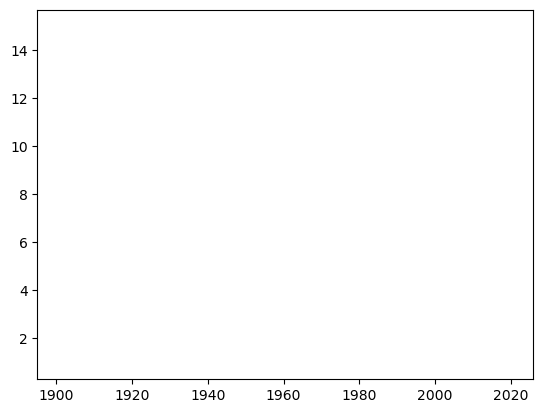

In [125]:
plt.scatter(x = prize_per_year.index,
           y = prize_per_year.values,
           c = 'dodgerblue',
           alpha = 0.7,
           s = 00)
plt.show()

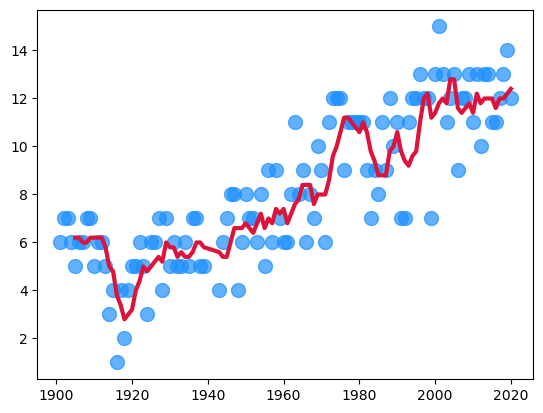

In [28]:
plt.scatter(x = prize_per_year.index,
           y = prize_per_year.values,
           c = 'dodgerblue',
           alpha = 0.7,
           s = 100)
plt.plot(prize_per_year.index, rolling_prize_year.values,
        c = 'crimson',
        linewidth = 3)
plt.show()

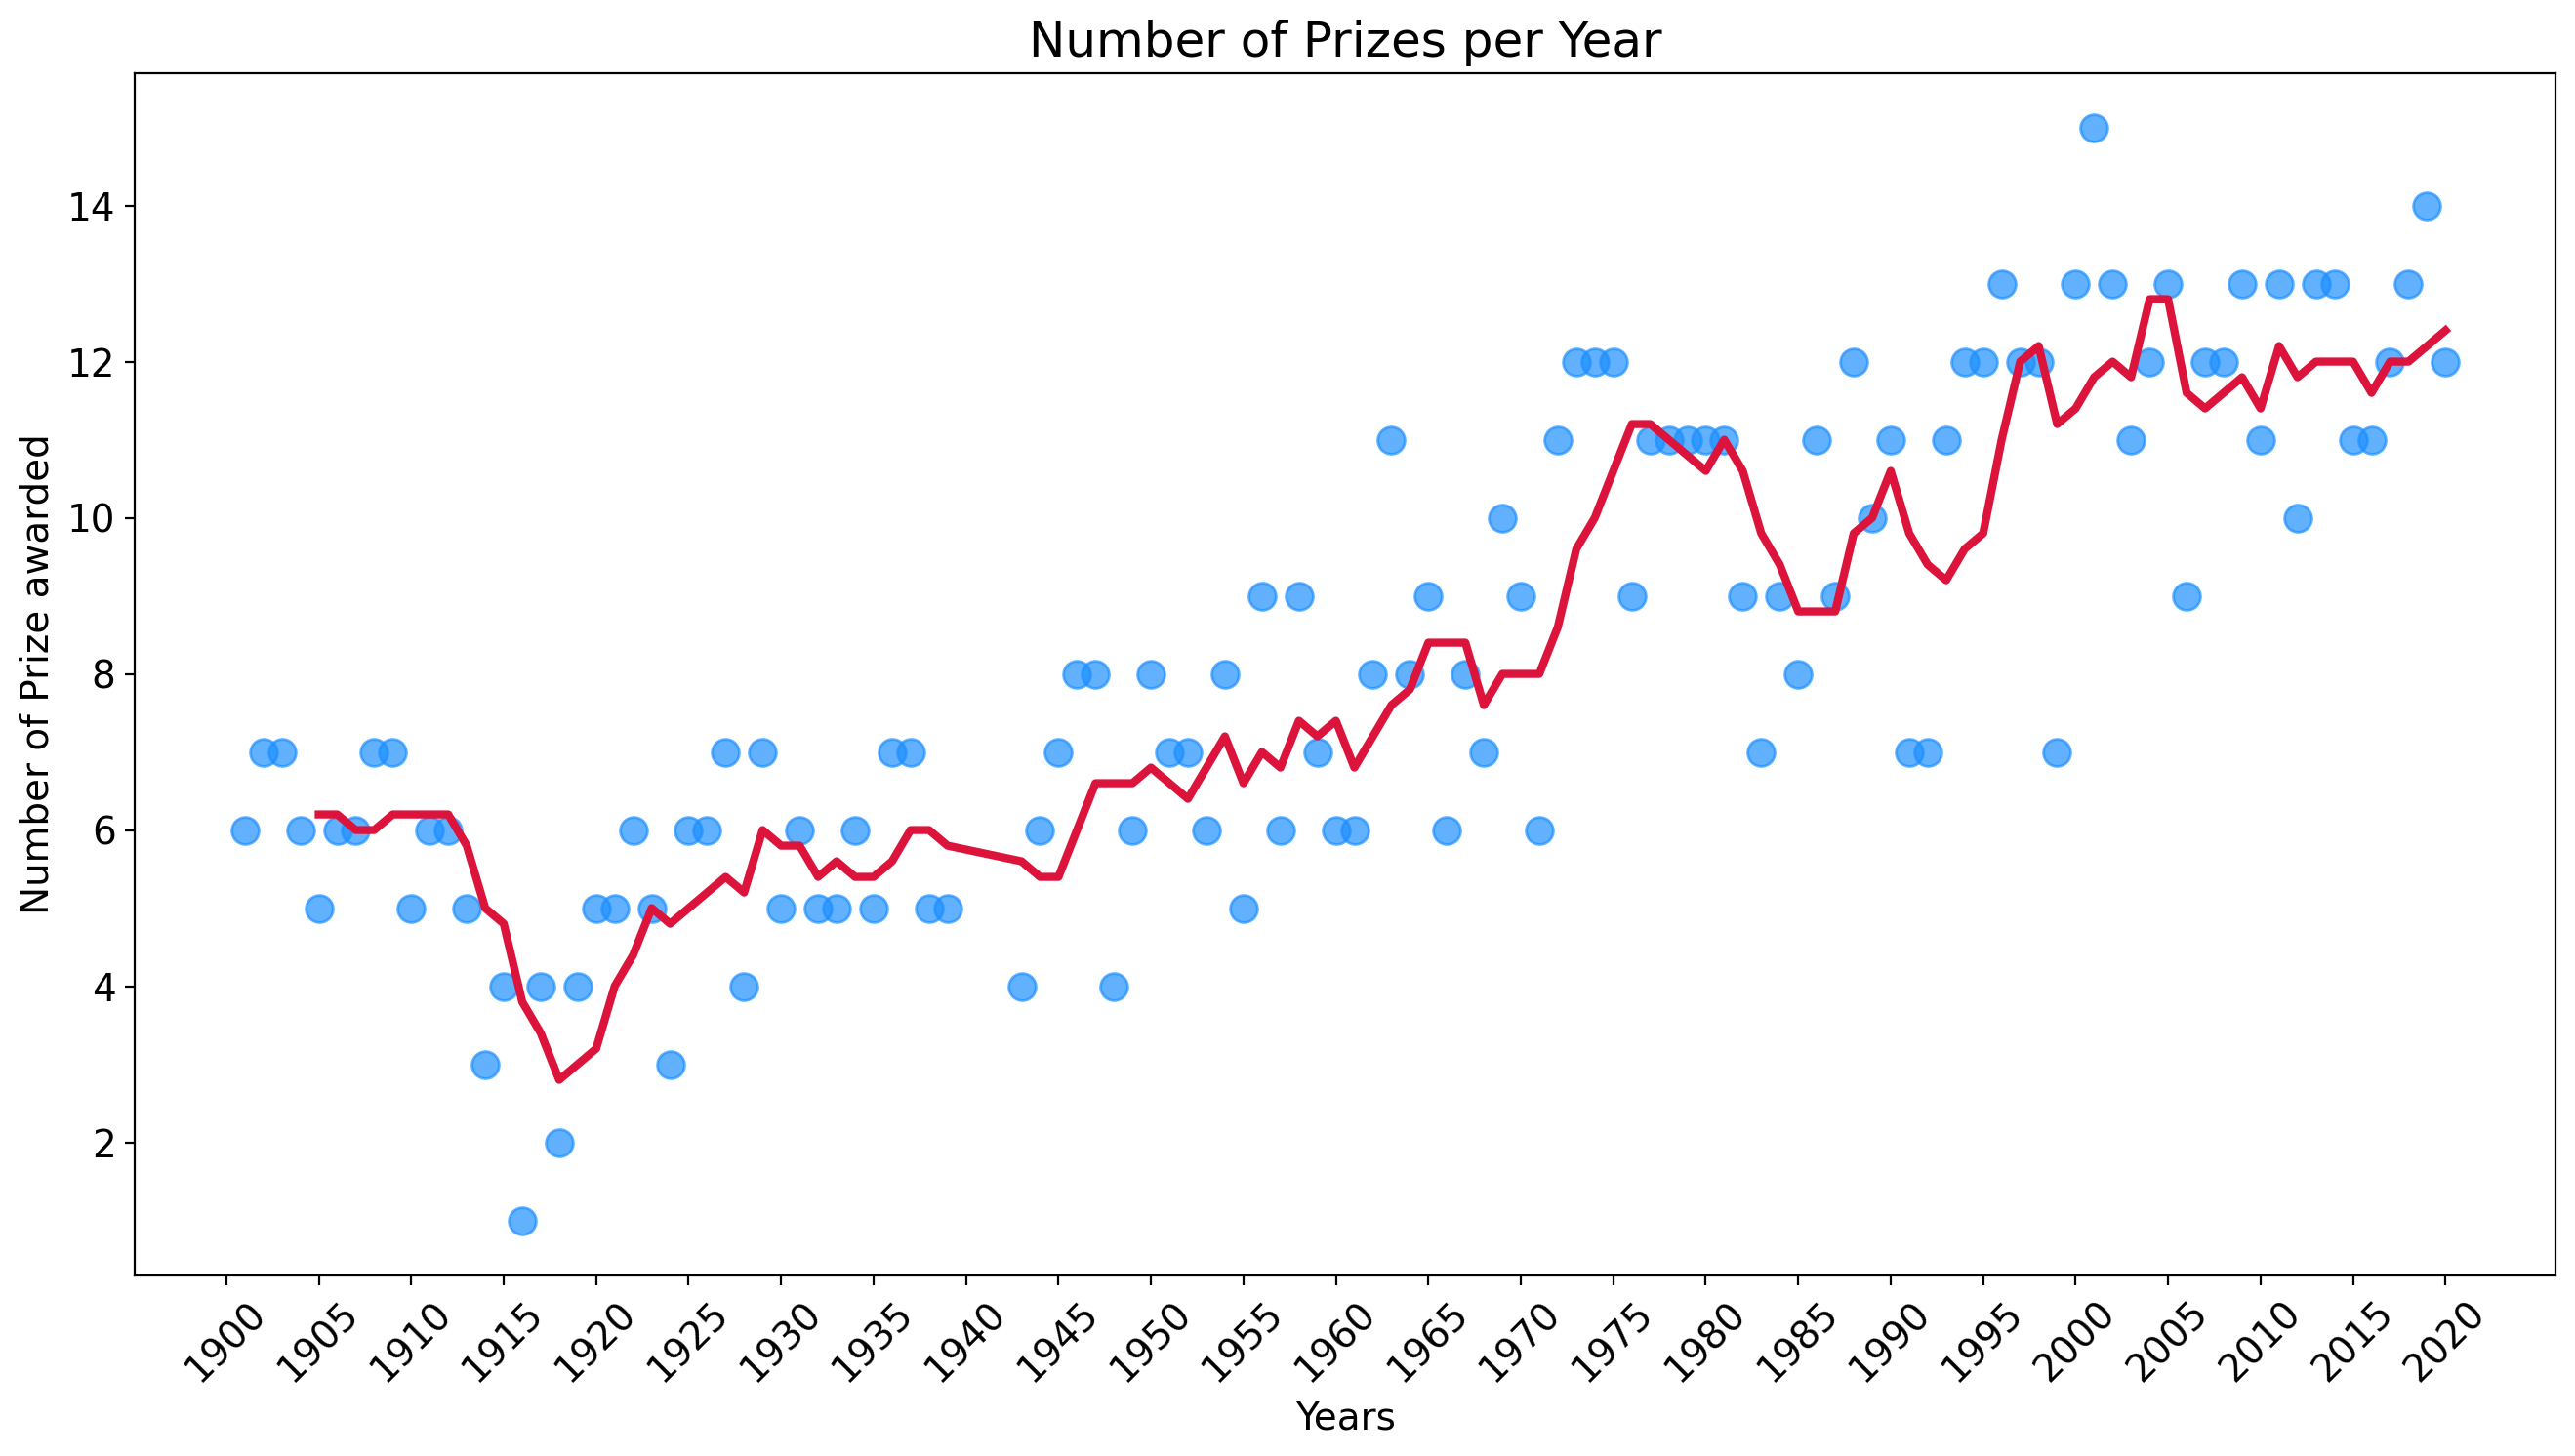

In [29]:
plt.figure(figsize = (16,8), dpi = 200)
plt.title('Number of Prizes per Year', fontsize = 18)
plt.yticks(fontsize = 14)
plt.xticks(np.arange(1900, 2021, 5), fontsize = 14, rotation = 45)
plt.xlabel('Years', fontsize = 14)
plt.ylabel('Number of Prize awarded', fontsize = 14)
plt.scatter(x = prize_per_year.index,
           y = prize_per_year.values,
           c = 'dodgerblue',
           alpha = 0.7,
           s = 100)
plt.plot(prize_per_year.index, rolling_prize_year.values,
        c = 'crimson',
        linewidth = 3)
plt.show()

# Are More Prizes Shared Than Before?

**Challenge**: Investigate if more prizes are shared than before. 

* Calculate the average prize share of the winners on a year by year basis.
* Calculate the 5 year rolling average of the percentage share.
* Copy-paste the cell from the chart you created above.
* Modify the code to add a secondary axis to your Matplotlib chart.
* Plot the rolling average of the prize share on this chart. 
* See if you can invert the secondary y-axis to make the relationship even more clear. 

In [30]:
yearly_avg_share = df_data.groupby('year').agg({'share_pct': pd.Series.mean})
rolling_avg_share = yearly_avg_share.rolling(window = 5).mean()

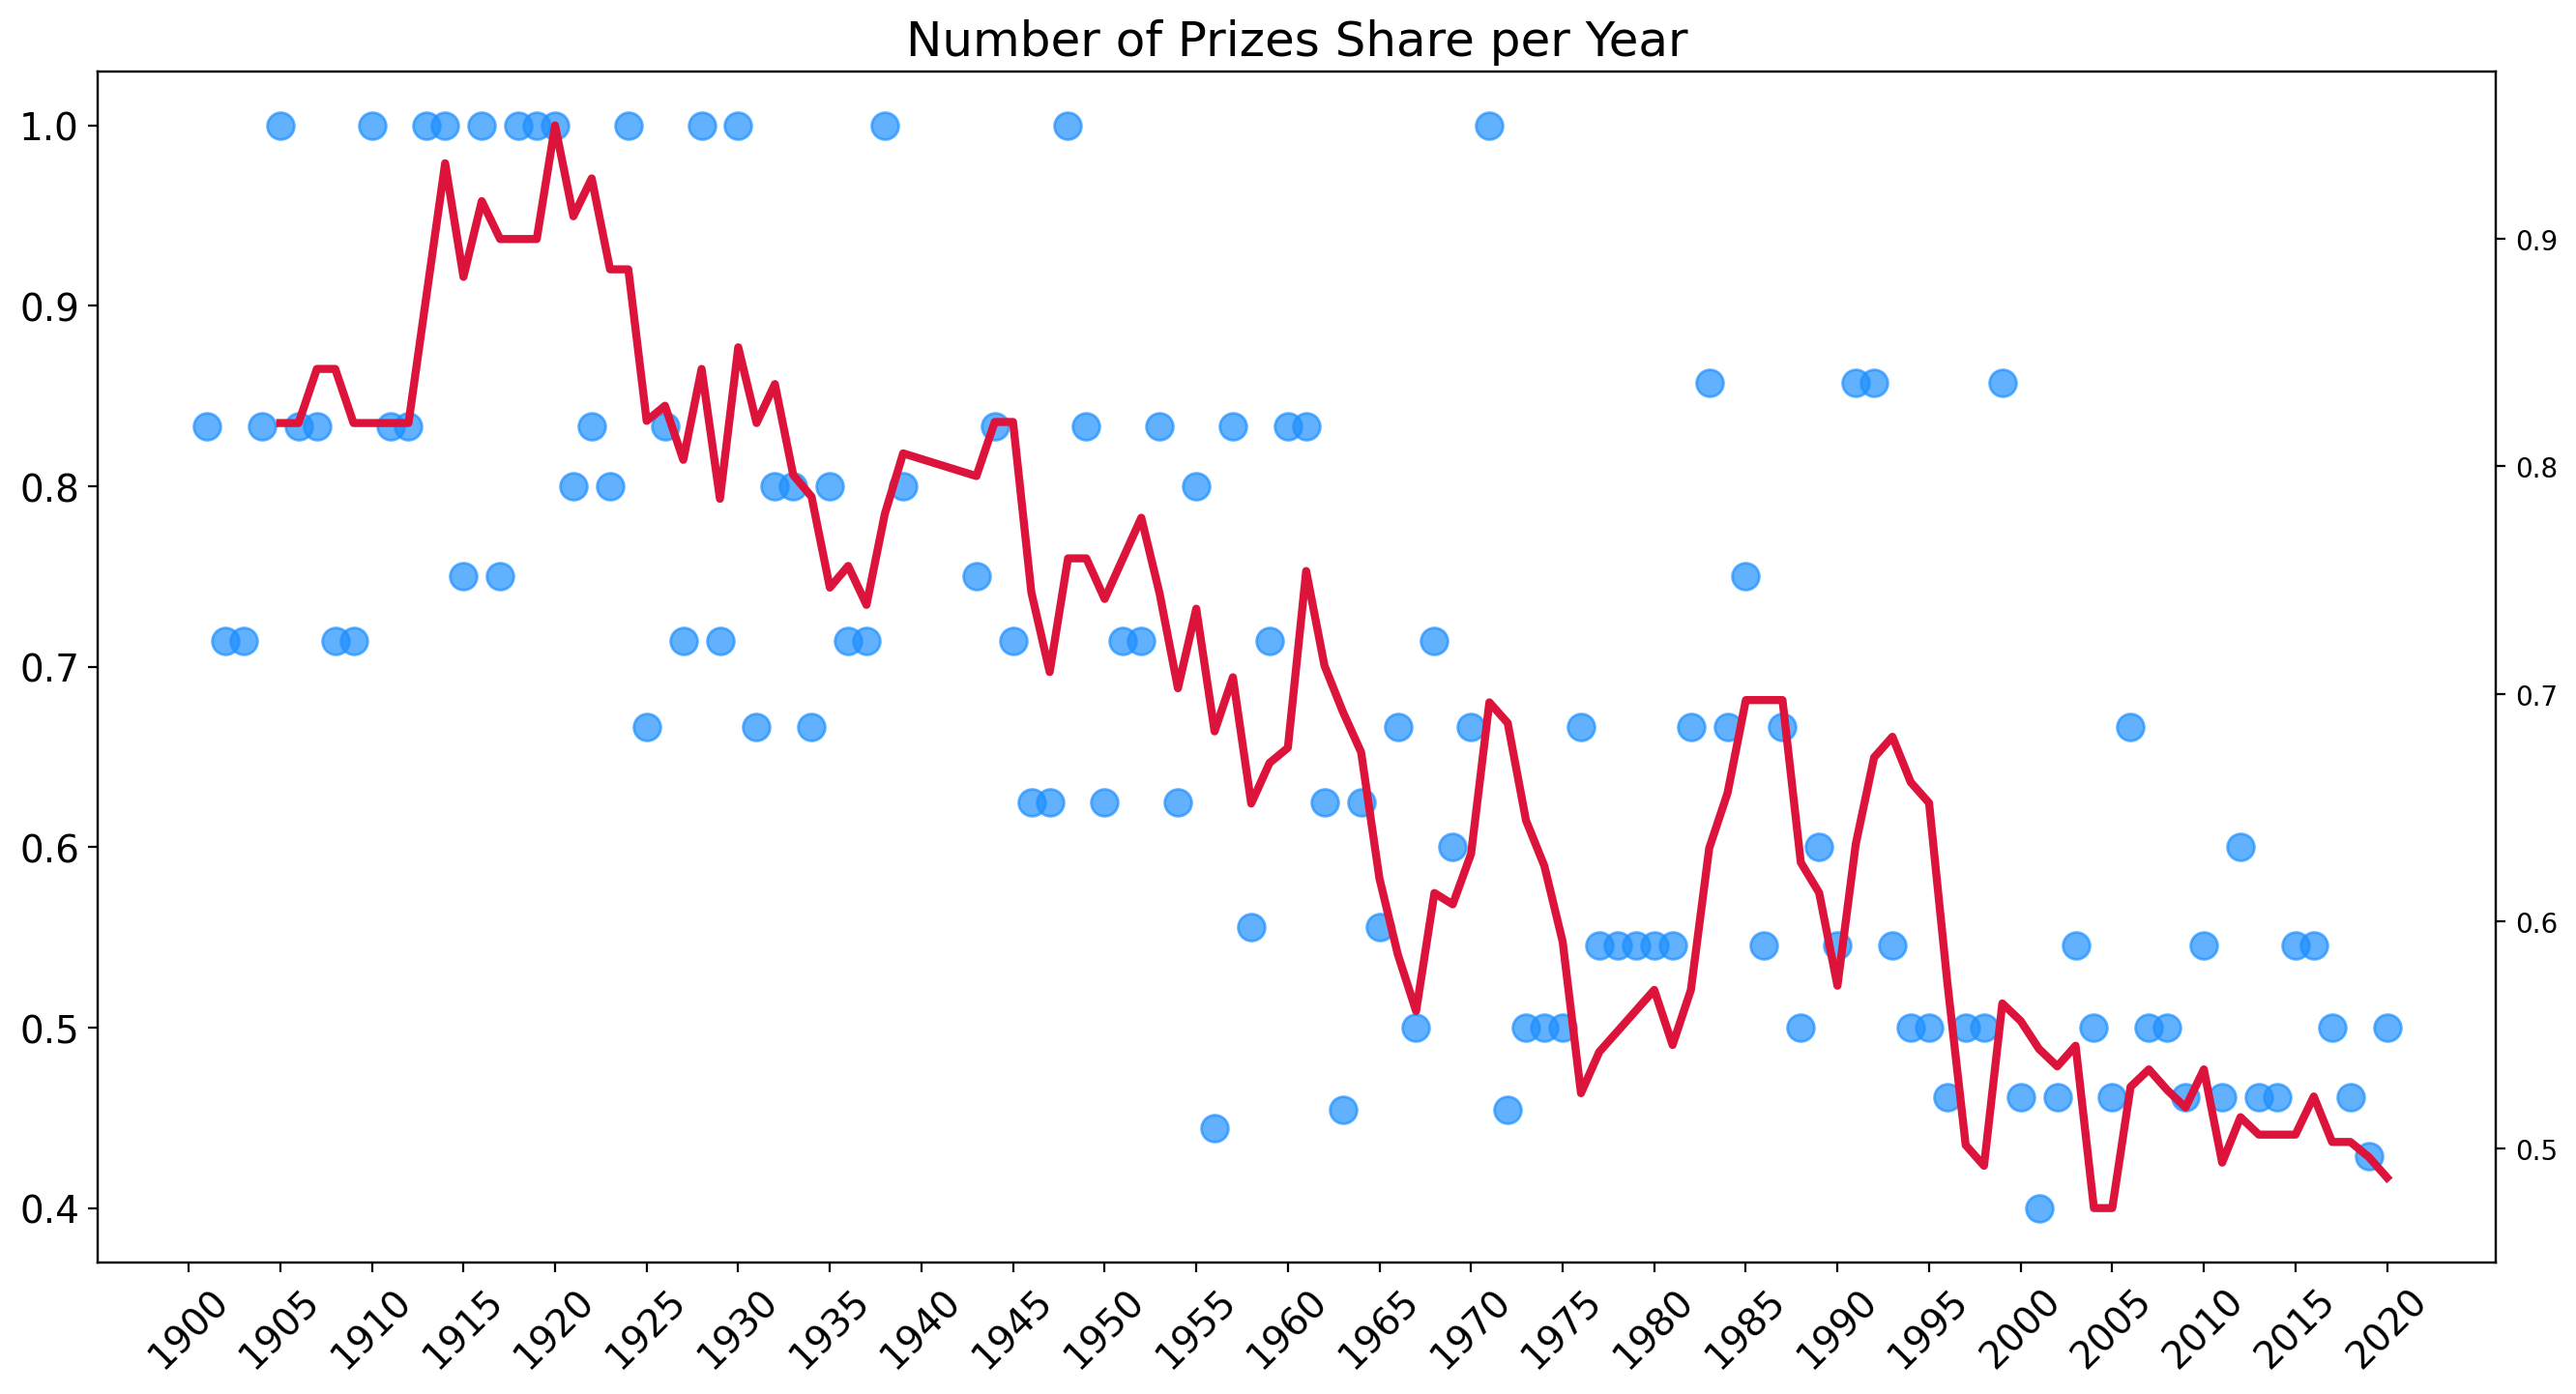

In [31]:
plt.figure(figsize = (16,8), dpi = 200)
plt.title('Number of Prizes Share per Year', fontsize = 18)
plt.yticks(fontsize = 14)
plt.xticks(np.arange(1900, 2021, 5), fontsize = 14, rotation = 45)

ax1 = plt.gca()
ax2 = plt.twinx()

ax1.scatter(x = yearly_avg_share.index,
           y = yearly_avg_share.values,
           c = 'dodgerblue',
           alpha = 0.7,
           s = 100)

ax2.plot(yearly_avg_share.index, rolling_avg_share.values,
        c = 'crimson',
        linewidth = 3)

plt.show()

# The Countries with the Most Nobel Prizes

**Challenge**: 
* Create a Pandas DataFrame called `top20_countries` that has the two columns. The `prize` column should contain the total number of prizes won. 

<img src=https://i.imgur.com/6HM8rfB.png width=350>

* Is it best to use `birth_country`, `birth_country_current` or `organization_country`? 
* What are some potential problems when using `birth_country` or any of the others? Which column is the least problematic? 
* Then use plotly to create a horizontal bar chart showing the number of prizes won by each country. Here's what you're after:

<img src=https://i.imgur.com/agcJdRS.png width=750>

* What is the ranking for the top 20 countries in terms of the number of prizes?

In [32]:
top_countries = df_data.groupby('birth_country_current',as_index=False).agg({'prize':pd.Series.count})

In [44]:
top20_countries = top_countries.sort_values('prize')[-20:]
top20_countries

birth_country_current  prize
7                    Belgium      9
31                   Hungary      9
33                     India      9
2                  Australia     10
20                   Denmark     12
54                    Norway     12
13                     China     12
51               Netherlands     18
3                    Austria     18
39                     Italy     19
68               Switzerland     19
11                    Canada     20
61                    Russia     26
40                     Japan     27
57                    Poland     27
67                    Sweden     29
25                    France     57
26                   Germany     84
73            United Kingdom    105
74  United States of America    281

In [45]:
h_bar = px.bar(y = top20_countries.birth_country_current, x = top20_countries.prize, 
               orientation = 'h', title = 'Top 20 Countires by Number of Prizes',
              color = top20_countries.prize, color_continuous_scale = 'viridis')
h_bar.update_layout(xaxis_title = 'Number of Prizes', yaxis_title = 'Country Name',
                   coloraxis_showscale = False)
h_bar.show()

# Use a Choropleth Map to Show the Number of Prizes Won by Country

* Create this choropleth map using [the plotly documentation](https://plotly.com/python/choropleth-maps/):

<img src=https://i.imgur.com/s4lqYZH.png>

* Experiment with [plotly's available colours](https://plotly.com/python/builtin-colorscales/). I quite like the sequential colour `matter` on this map. 

Hint: You'll need to use a 3 letter country code for each country. 


In [47]:
df_countries = df_data.groupby(['birth_country_current', 'ISO'], as_index = False).agg({'prize':pd.Series.count})

In [48]:
df_countries.sort_values('prize', ascending = False)

birth_country_current  ISO  prize
74  United States of America  USA    281
73            United Kingdom  GBR    105
26                   Germany  DEU     84
25                    France  FRA     57
67                    Sweden  SWE     29
..                       ...  ...    ...
32                   Iceland  ISL      1
47                Madagascar  MDG      1
34                 Indonesia  IDN      1
36                      Iraq  IRQ      1
78                  Zimbabwe  ZWE      1

[79 rows x 3 columns]

In [53]:
world_map = px.choropleth(df_countries, locations = 'ISO', color = 'prize', 
                          hover_name = 'birth_country_current', 
                          color_continuous_scale = px.colors.sequential.matter)
world_map.update_layout(coloraxis_showscale = True,)
world_map.show()

# In Which Categories are the Different Countries Winning Prizes? 

**Challenge**: See if you can divide up the plotly bar chart you created above to show the which categories made up the total number of prizes. Here's what you're aiming for:

<img src=https://i.imgur.com/iGaIKCL.png>

* In which category are Germany and Japan the weakest compared to the United States?
* In which category does Germany have more prizes than the UK?
* In which categories does France have more prizes than Germany?
* Which category makes up most of Australia's nobel prizes?
* Which category makes up half of the prizes in the Netherlands?
* Does the United States have more prizes in Economics than all of France? What about in Physics or Medicine?


The hard part is preparing the data for this chart! 


*Hint*: Take a two-step approach. The first step is grouping the data by country and category. Then you can create a DataFrame that looks something like this:

<img src=https://i.imgur.com/VKjzKa1.png width=450>


In [54]:
cat_countries = df_data.groupby(['birth_country_current','category'],as_index=False).agg({'prize': pd.Series.count})

In [55]:
cat_countries.sort_values('prize', ascending = False, inplace = True)

In [56]:
cat_countries

birth_country_current   category  prize
204  United States of America   Medicine     78
206  United States of America    Physics     70
201  United States of America  Chemistry     55
202  United States of America  Economics     49
198            United Kingdom   Medicine     28
..                        ...        ...    ...
97                       Iraq      Peace      1
99                    Ireland   Medicine      1
100                   Ireland    Physics      1
102                    Israel  Economics      1
210                  Zimbabwe      Peace      1

[211 rows x 3 columns]

In [58]:
merged_df = pd.merge(cat_countries, top20_countries, on = 'birth_country_current')
merged_df.columns = ['birth_country_current', 'category', 'cat_prize', 'total_prize']
merged_df.sort_values('total_prize', inplace = True)

In [60]:
cat_country_bar = px.bar(x = merged_df.cat_prize, 
                        y = merged_df.birth_country_current, 
                        color = merged_df.category, 
                        orientation = 'h',
                        title = 'Top 20 Countries by Number of Prizes and Category')
cat_country_bar.update_layout(xaxis_title = 'Number of Prizes', 
                             yaxis_title = 'Country')
cat_country_bar.show()

### Number of Prizes Won by Each Country Over Time

* When did the United States eclipse every other country in terms of the number of prizes won? 
* Which country or countries were leading previously?
* Calculate the cumulative number of prizes won by each country in every year. Again, use the `birth_country_current` of the winner to calculate this. 
* Create a [plotly line chart](https://plotly.com/python/line-charts/) where each country is a coloured line. 

In [61]:
prizes_by_year = df_data.groupby(['birth_country_current', 'year'], as_index = False).count()
prizes_by_year = prizes_by_year.sort_values('year')[['year', 'birth_country_current', 'prize']]

In [63]:
cumulative_prizes = prizes_by_year.groupby(['birth_country_current', 'year']).sum().groupby(level=[0]).cumsum()

In [64]:
cumulative_prizes.reset_index(inplace = True)

In [65]:
line_chart = px.line(cumulative_prizes, x='year', y='prize', 
                    color='birth_country_current', hover_name='birth_country_current')
line_chart.update_layout(xaxis_title = 'Year', yaxis_title = 'Number of Prizes')
line_chart.show()

# What are the Top Research Organisations?

**Challenge**: Create a bar chart showing the organisations affiliated with the Nobel laureates. It should looks something like this:

<img src=https://i.imgur.com/zZihj2p.png width=600>

* Which organisations make up the top 20?
* How many Nobel prize winners are affiliated with the University of Chicago and Harvard University?

In [66]:
top20_orgs = df_data.organization_name.value_counts()[:20]

In [67]:
top20_orgs.sort_values(ascending = True, inplace = True)

In [71]:
org_bar = px.bar(x = top20_orgs.values, y = top20_orgs.index, orientation = 'h', 
                color = top20_orgs.values, color_continuous_scale = px.colors.sequential.haline, 
                title = 'Top 20 Organizations by Number of Prizes')
org_bar.update_layout(xaxis_title = 'Number of Prizes', 
       yaxis_title = 'Organizatons', 
       coloraxis_showscale = False)
org_bar.show()

# Which Cities Make the Most Discoveries? 

Where do major discoveries take place?  

**Challenge**: 
* Create another plotly bar chart graphing the top 20 organisation cities of the research institutions associated with a Nobel laureate. 
* Where is the number one hotspot for discoveries in the world?
* Which city in Europe has had the most discoveries?

In [78]:
top20_cities = df_data.organization_city.value_counts().head(20)
top20_cities.sort_values(ascending = True, inplace = True)
top20_cities

Ithaca, NY          8
Los Angeles, CA     8
New Haven, CT       9
Heidelberg          9
Boston, MA          9
Munich              9
Moscow             10
Stockholm          10
Berlin             12
Oxford             12
Pasadena, CA       17
Princeton, NJ      19
Chicago, IL        20
Berkeley, CA       21
Stanford, CA       24
Paris              25
London             27
Cambridge          31
New York, NY       45
Cambridge, MA      50
Name: organization_city, dtype: int64

In [84]:
city_bar = px.bar(x = top20_cities.values, y = top20_cities.index, orientation = 'h', 
                color = top20_cities.values, color_continuous_scale = px.colors.sequential.haline, 
                title = 'Top 20 Organizations City by Number of Prizes')
city_bar.update_layout(xaxis_title = 'Number of Prizes', 
       yaxis_title = 'Organizatons City', 
       coloraxis_showscale = False)
city_bar.show()

# Where are Nobel Laureates Born? Chart the Laureate Birth Cities 

**Challenge**: 
* Create a plotly bar chart graphing the top 20 birth cities of Nobel laureates. 
* Use a named colour scale called `Plasma` for the chart.
* What percentage of the United States prizes came from Nobel laureates born in New York? 
* How many Nobel laureates were born in London, Paris and Vienna? 
* Out of the top 5 cities, how many are in the United States?


In [82]:
top20_birthcities = df_data.birth_city.value_counts().head(20)
top20_birthcities.sort_values(ascending = True, inplace = True)
top20_birthcities

Ann Arbor, MI             3
Montreal                  4
Cairo                     4
Pittsburgh, PA            4
Prague                    5
Frankfurt-on-the-Main     5
Hamburg                   6
Stockholm                 6
Moscow                    7
Munich                    7
Budapest                  8
Brooklyn, NY              8
Washington, DC            8
Boston, MA                8
Berlin                   11
Chicago, IL              12
Vienna                   14
London                   19
Paris                    26
New York, NY             53
Name: birth_city, dtype: int64

In [87]:
birth_city_bar = px.bar(x = top20_birthcities.values, y = top20_birthcities.index, orientation = 'h', 
                color = top20_birthcities.values, color_continuous_scale = px.colors.sequential.Plasma, 
                title = 'Top 20 birth City of Laureates')
birth_city_bar.update_layout(xaxis_title = 'Number of Prizes per Cith', 
       yaxis_title = 'Birth City', 
       coloraxis_showscale = False)
birth_city_bar.show()

# Plotly Sunburst Chart: Combine Country, City, and Organisation

**Challenge**: 

* Create a DataFrame that groups the number of prizes by organisation. 
* Then use the [plotly documentation to create a sunburst chart](https://plotly.com/python/sunburst-charts/)
* Click around in your chart, what do you notice about Germany and France? 


Here's what you're aiming for:

<img src=https://i.imgur.com/cemX4m5.png width=300>



In [88]:
country_city_org = df_data.groupby(['organization_country', 'organization_city', 'organization_name'], as_index = False).agg({'prize': pd.Series.count})

In [91]:
country_city_org.sort_values('prize', ascending = False, inplace = True)
country_city_org

organization_country     organization_city  \
205  United States of America         Cambridge, MA   
280  United States of America          Stanford, CA   
206  United States of America         Cambridge, MA   
209  United States of America           Chicago, IL   
195  United States of America          Berkeley, CA   
..                        ...                   ...   
236  United States of America       Minneapolis, MN   
237  United States of America     Mountain View, CA   
169            United Kingdom         Hertfordshire   
145               Switzerland                 Berne   
290  United States of America  Yorktown Heights, NY   

                               organization_name  prize  
205                           Harvard University     29  
280                          Stanford University     23  
206  Massachusetts Institute of Technology (MIT)     21  
209                        University of Chicago     20  
195                     University of California     19  
..                                           ...    ...  
236                      University of Minnesota      1  
237                       Digital Pathways, Inc.      1  
169                      Francis Crick Institute      1  
145                             Berne University      1  
290         IBM Thomas J. Watson Research Center      1  

[291 rows x 4 columns]

In [92]:
burst = px.sunburst(country_city_org, 
                    path=['organization_country', 'organization_city', 'organization_name'], 
                    values = 'prize', 
                    title = 'Where do discoveries take place?')
burst.update_layout(xaxis_title = 'Number of Prizes', yaxis_title = 'City', 
                   coloraxis_showscale = False)
burst.show()

# Patterns in the Laureate Age at the Time of the Award

How Old Are the Laureates When the Win the Prize?

**Challenge**: Calculate the age of the laureate in the year of the ceremony and add this as a column called `winning_age` to the `df_data` DataFrame. Hint: you can use [this](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.dt.html) to help you. 



In [103]:
df_data['winning_age'] = df_data['year'] - df_data['birth_date'].dt.year 

In [104]:
df_data.head()

year    category                                           prize  \
0  1901   Chemistry               The Nobel Prize in Chemistry 1901   
1  1901  Literature              The Nobel Prize in Literature 1901   
2  1901    Medicine  The Nobel Prize in Physiology or Medicine 1901   
3  1901       Peace                      The Nobel Peace Prize 1901   
4  1901       Peace                      The Nobel Peace Prize 1901   

                                          motivation prize_share  \
0  "in recognition of the extraordinary services ...         1/1   
1  "in special recognition of his poetic composit...         1/1   
2  "for his work on serum therapy, especially its...         1/1   
3                                                NaN         1/2   
4                                                NaN         1/2   

  laureate_type                     full_name birth_date         birth_city  \
0    Individual  Jacobus Henricus van 't Hoff 1852-08-30          Rotterdam   
1    Individual               Sully Prudhomme 1839-03-16              Paris   
2    Individual        Emil Adolf von Behring 1854-03-15  Hansdorf (Lawice)   
3    Individual                Frédéric Passy 1822-05-20              Paris   
4    Individual             Jean Henry Dunant 1828-05-08             Geneva   

      birth_country birth_country_current   sex   organization_name  \
0       Netherlands           Netherlands  Male   Berlin University   
1            France                France  Male                 NaN   
2  Prussia (Poland)                Poland  Male  Marburg University   
3            France                France  Male                 NaN   
4       Switzerland           Switzerland  Male                 NaN   

  organization_city organization_country  ISO  share_pct  winning_age  
0            Berlin              Germany  NLD       1.00        49.00  
1               NaN                  NaN  FRA       1.00        62.00  
2           Marburg              Germany  POL       1.00        47.00  
3               NaN                  NaN  FRA       0.50        79.00  
4               NaN                  NaN  CHE       0.50        73.00

In [115]:
sorted_winning_age = df_data.sort_values('winning_age')
sorted_winning_age.dropna(inplace = True)

### Who were the oldest and youngest winners?

**Challenge**: 
* What are the names of the youngest and oldest Nobel laureate? 
* What did they win the prize for?
* What is the average age of a winner?
* 75% of laureates are younger than what age when they receive the prize?
* Use Seaborn to [create histogram](https://seaborn.pydata.org/generated/seaborn.histplot.html) to visualise the distribution of laureate age at the time of winning. Experiment with the number of `bins` to see how the visualisation changes.

In [116]:
print(f"Youngest Nobel Laureate: {sorted_winning_age['full_name'].iloc[0]}")
print(f"Oldest Nobel Laureate: {sorted_winning_age['full_name'].iloc[-1]}")
print(f"Average winning age: {df_data['winning_age'].mean()}")

Youngest Nobel Laureate: William Lawrence Bragg
Oldest Nobel Laureate: John Goodenough
Average winning age: 59.94860813704497


### Descriptive Statistics for the Laureate Age at Time of Award

* Calculate the descriptive statistics for the age at the time of the award. 
* Then visualise the distribution in the form of a histogram using [Seaborn's .histplot() function](https://seaborn.pydata.org/generated/seaborn.histplot.html).
* Experiment with the `bin` size. Try 10, 20, 30, and 50.  

In [117]:
df_data['winning_age'].describe()

count   934.00
mean     59.95
std      12.62
min      17.00
25%      51.00
50%      60.00
75%      69.00
max      97.00
Name: winning_age, dtype: float64

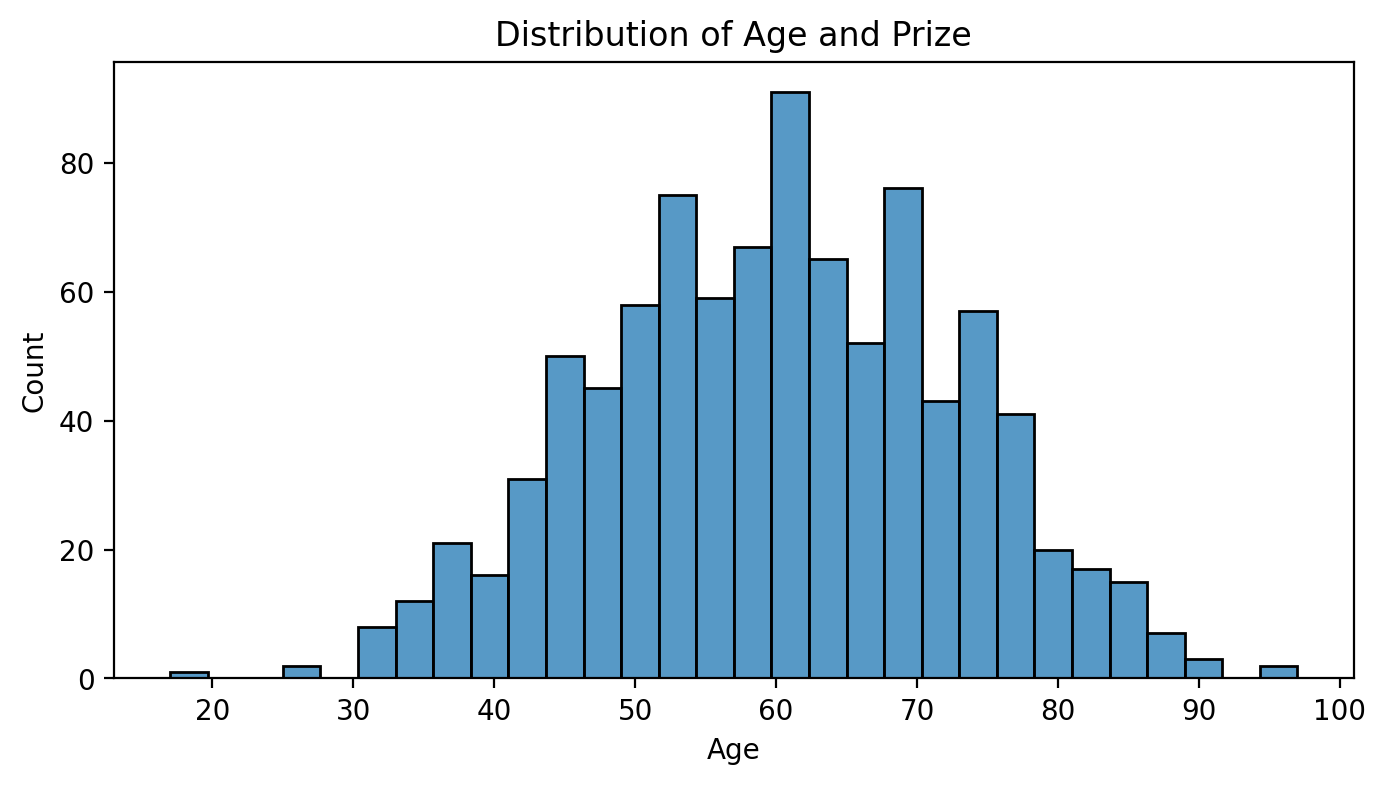

In [118]:
plt.figure(figsize = (8, 4), dpi = 200)
sns.histplot(data = df_data, x = df_data.winning_age, bins = 30)
plt.xlabel('Age')
plt.title('Distribution of Age and Prize')
plt.show()

### Age at Time of Award throughout History

Are Nobel laureates being nominated later in life than before? Have the ages of laureates at the time of the award increased or decreased over time?

**Challenge**

* Use Seaborn to [create a .regplot](https://seaborn.pydata.org/generated/seaborn.regplot.html?highlight=regplot#seaborn.regplot) with a trendline.
* Set the `lowess` parameter to `True` to show a moving average of the linear fit.
* According to the best fit line, how old were Nobel laureates in the years 1900-1940 when they were awarded the prize?
* According to the best fit line, what age would it predict for a Nobel laureate in 2020?


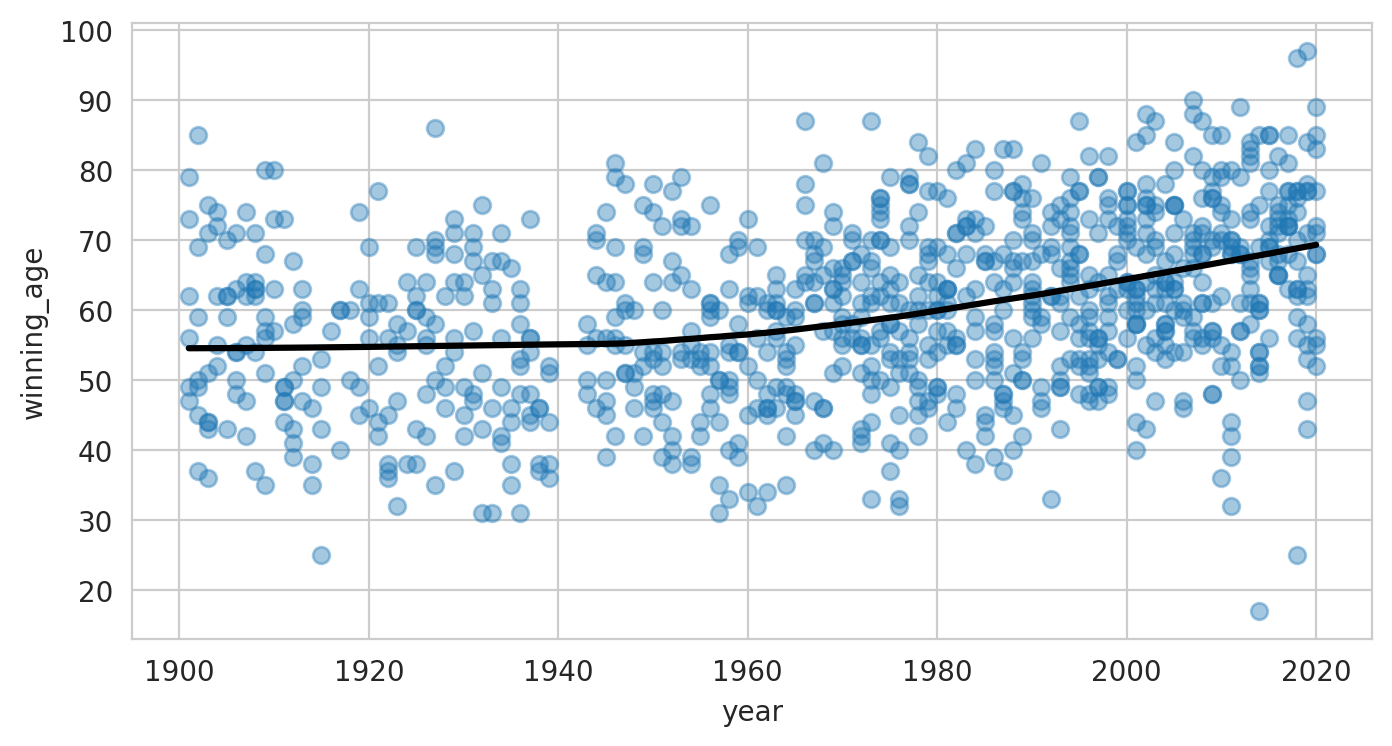

In [120]:
plt.figure(figsize = (8, 4), dpi = 200)
with sns.axes_style('whitegrid'):
    sns.regplot(data = df_data, x = 'year', y = 'winning_age', 
               lowess = True, scatter_kws = {'alpha' : 0.4}, 
               line_kws = {'color': 'black'})
plt.show()

### Winning Age Across the Nobel Prize Categories

How does the age of laureates vary by category? 

* Use Seaborn's [`.boxplot()`](https://seaborn.pydata.org/generated/seaborn.boxplot.html?highlight=boxplot#seaborn.boxplot) to show how the mean, quartiles, max, and minimum values vary across categories. Which category has the longest "whiskers"? 
* In which prize category are the average winners the oldest?
* In which prize category are the average winners the youngest?

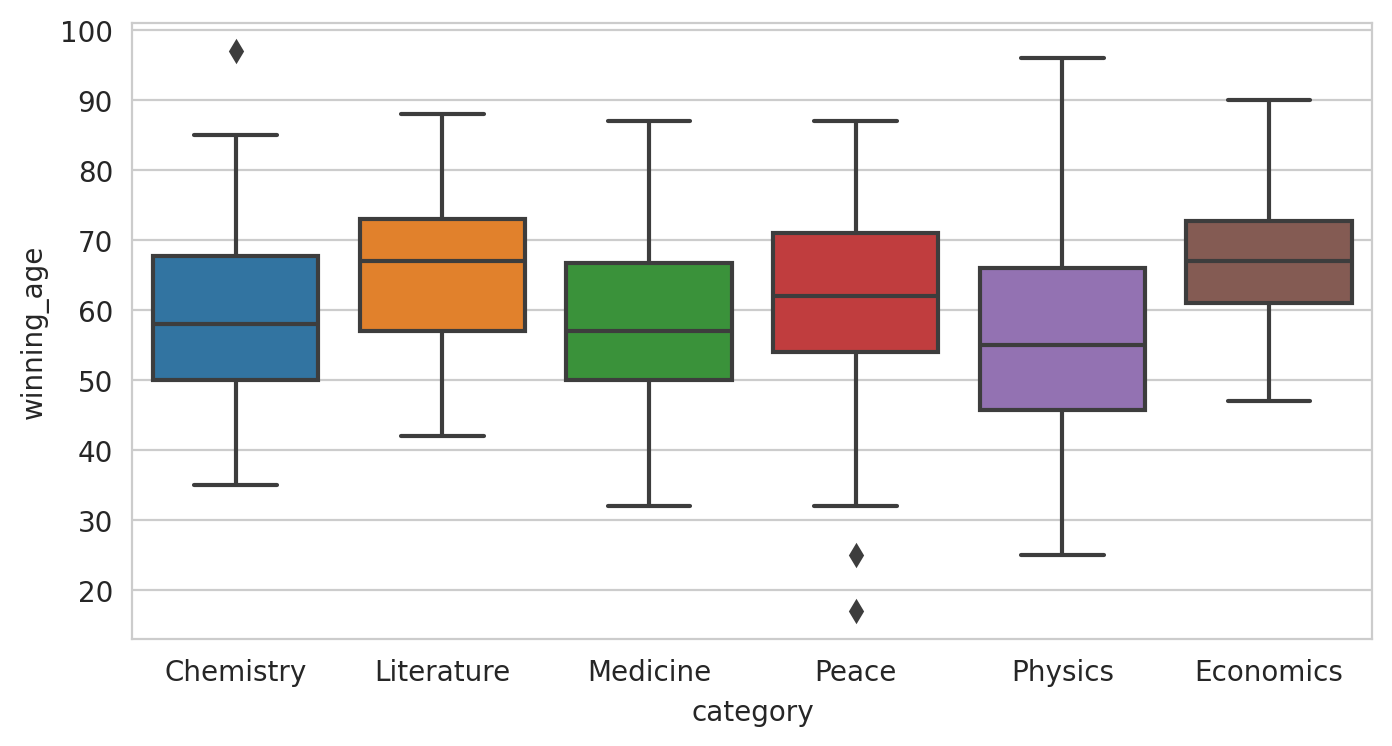

In [121]:
plt.figure(figsize = (8, 4), dpi = 200)
with sns.axes_style('whitegrid'):
    sns.boxplot(data = df_data, x = 'category', y = 'winning_age')
plt.show()

**Challenge**
* Now use Seaborn's [`.lmplot()`](https://seaborn.pydata.org/generated/seaborn.lmplot.html?highlight=lmplot#seaborn.lmplot) and the `row` parameter to create 6 separate charts for each prize category. Again set `lowess` to `True`.
* What are the winning age trends in each category? 
* Which category has the age trending up and which category has the age trending down? 
* Is this `.lmplot()` telling a different story from the `.boxplot()`?
* Create another chart with Seaborn. This time use `.lmplot()` to put all 6 categories on the same chart using the `hue` parameter. 


<Figure size 1600x800 with 0 Axes>

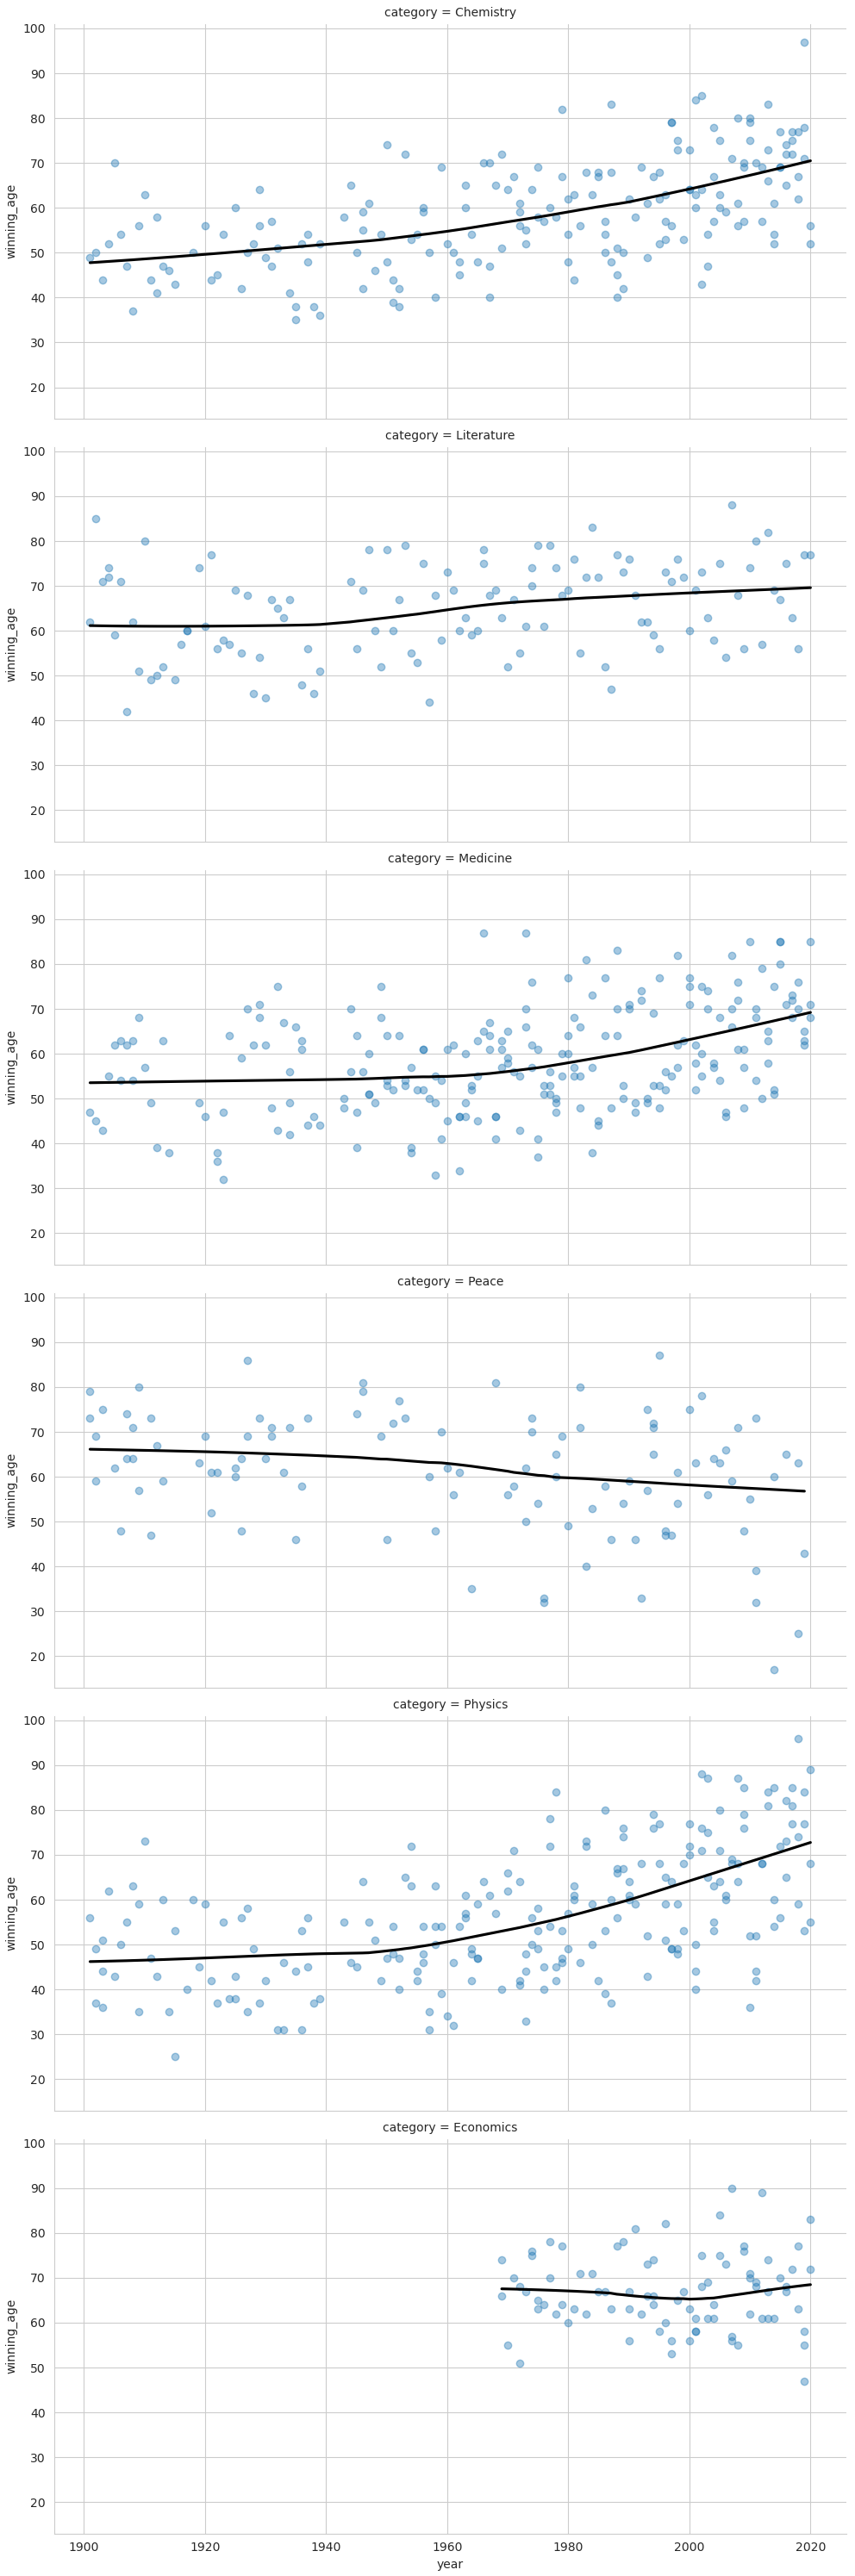

In [123]:
plt.figure(figsize = (8, 4), dpi = 200)
with sns.axes_style('whitegrid'):
    sns.lmplot(data = df_data, x = 'year', y = 'winning_age', 
                row = 'category', lowess = True, aspect = 2, scatter_kws = {'alpha' : 0.4}, 
               line_kws = {'color': 'black'})
plt.show()